<a href="https://colab.research.google.com/github/cr1085/machine_learning_clasification/blob/main/Modelo_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

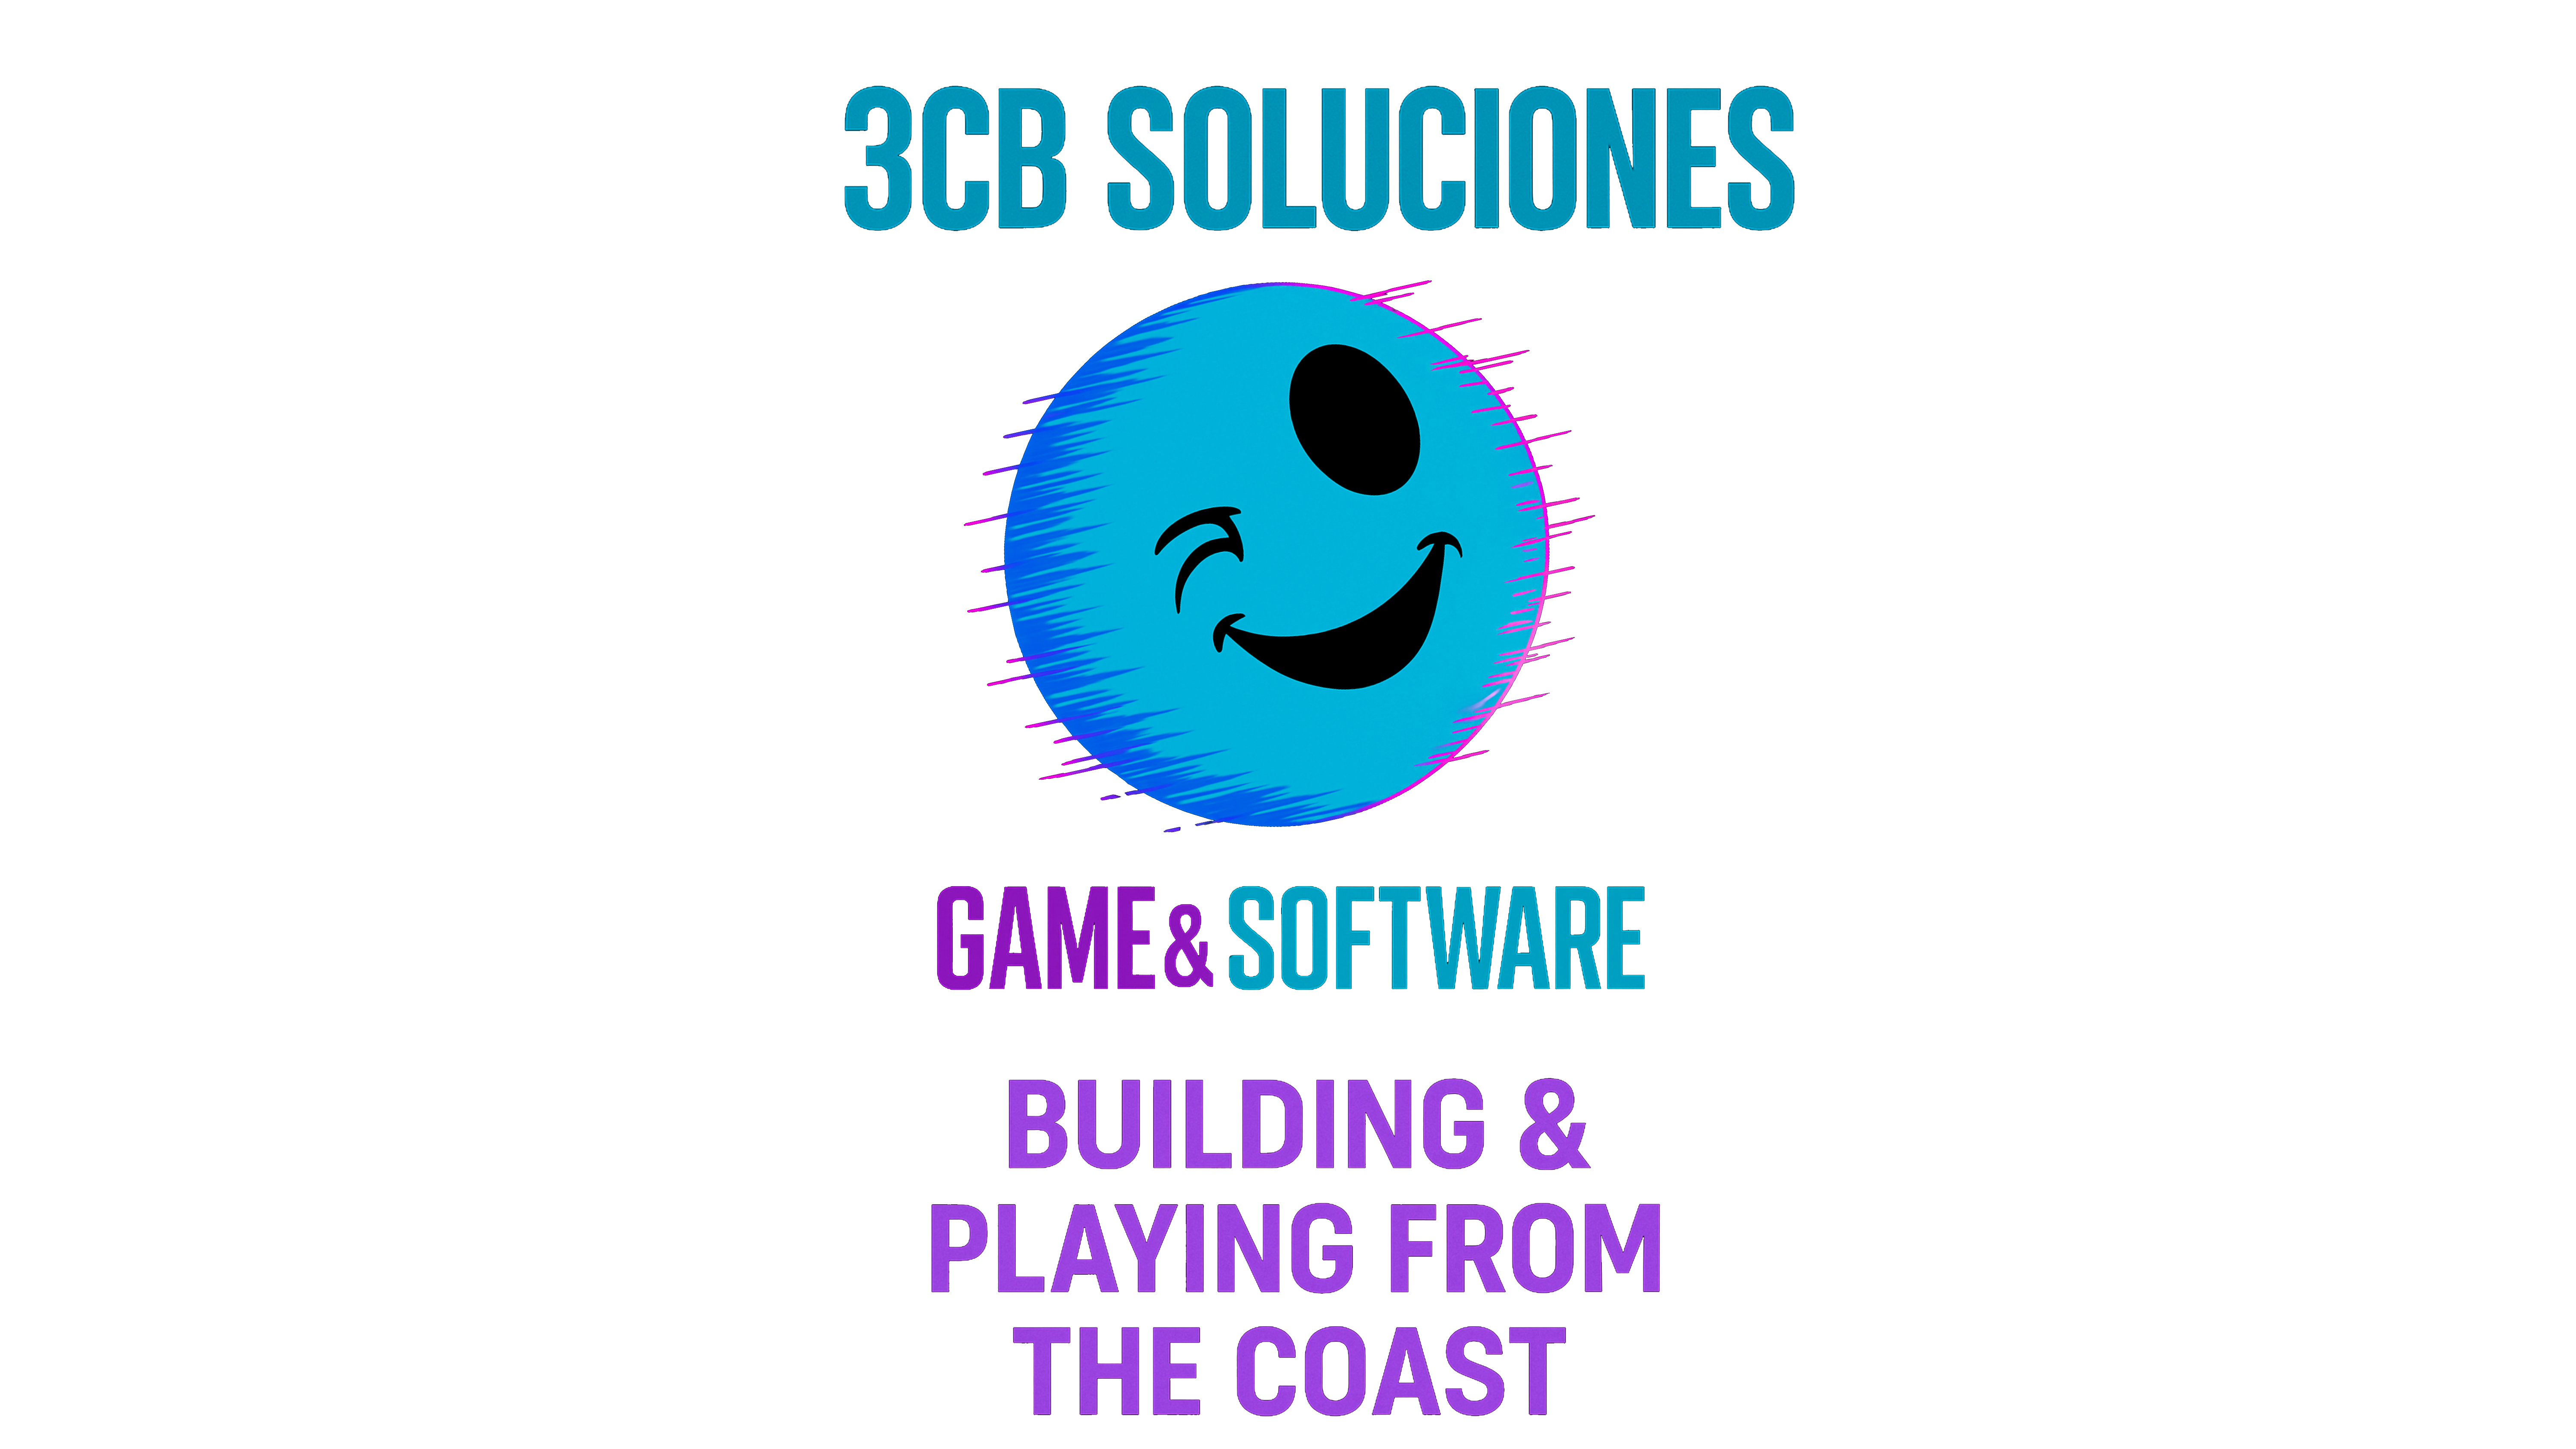
# Explicación del código:
*    Librerías utilizadas en la codificación
1.   numpy/pandas: Manipulación de datos.
2.   matplotlib/seaborn: Visualización.
3.   scikit-learn: Machine learning (modelo de procesamiento y de clasificación binaria)
4. Dataset: usamos el dataset de cáncer de mama de Wisconsin
*   30 características numéricas
*   Variable objetivo binaria (0: maligno, 1: benigno)
## Visualizaciones incluidas
1.   Distribución de clases objetivo
2.   Histogramas de todas las características
3.   Matriz de correlación entre características
4.   Matriz de confusión del modelo
5.   Importancia de características (Top 10)
### Modelo de machine learning
- **Random Forest:** Algoritmo potente para clasificación
- **Procesamiento:** Escalado estándar de características
- **Evaluación:** Reporte de clasificación, precisión, matriz de confusión.
# **5. Cómo ejecutarlo**
### Copia este código en un jupyter notebook o script.py
### Asegúrate de tener instaladas las librerías:
```bash
  pip install numpy
  pip install pandas
  pip install matplotlib
  pip install seaborn
  pip install sickit-learn
```
- Copia y pega este codigo en tu terminal, o ejecuta celda por celda en tu jupyter o todo el script
# **6. Posibles mejoras**

- Ajuste hiperparámetros con GridSearchCV
- Validación cruzada
- Prueba con otros algoritmos (SVM,XGBoost,etc.)
- Análisis más detallado de características.


**Este código proporciona un flujo completo de ML con visualizaciones profesionales listas para presentaciones o informes.**

In [ ]:
# importando las librerías escenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer
# -----------------------------
# Configurar estilos de los gráficos
plt.style.use('ggplot')
%matplotlib inline
# -----------------------------
# 1. cargar y explorar los datos
print("======1. Cargando y explorando los datos ===")
data = load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("\nPrimeras 5 filas de dataset:")
print(df.head())
print("\nInformación del dataset")
print(df.info())
print('\nEstadísticas descriptivas')
print(df.describe())
# Visualización de los datos
print('\n===2. Visualización de datos===')
plt.figure(figsize=(12,8))
sns.countplot(x='target', data=df)
plt.title('Distribucción de casos (0: Maligno, 1: Benigno)')
plt.show()
# Histogramas de las carcaterísticas
df.drop('target', axis=1).hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribución de caraterísticas', y=1.02)
plt.show()
# Matriz de correlacion
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de correlación entre cataracterísticas')
plt.show()
# Preprocesamiento de datos
print('\n===3. Preprocesamiento de datos===')
x=df.drop('target', axis=1)
y=df['target']
# Divir en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Escalar caracteristicas
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("===SALIDAS===")
print(f"\nForma de los datos de entrenamiento: {x_train.shape}")
print(f"Forma de los datos de prueba: {x_test.shape}")
# Entrenamiento del modelo
print('\n===4. Entrenamiento del modelo===')
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
# Evaluación del modelo
print("\n===5. Evaluación del modelo===")
y_pred = model.predict(x_test)
print("\n==Reporte de clasificación==:")
print(classification_report(y_test, y_pred))
# ===================================================
# Las matrices de confusión son herramientas esenciales en el
# aprendizaje automático, especialmente para evaluar el rendimiento
# de modelos de clasificación. Permiten visualizar y analizar la precisión-
# de las predicciones, identificando errores comunes y áreas donde el
# modelo necesita mejoras.
print("\nMatriz de confusión:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
# ===================================
print(f"\nPrecisión del modelo: {accuracy_score(y_test,y_pred):.2f}")
# Importancia de las características
print("\n===6. Importancia de las características====")
feature_importance = pd.Series(model.feature_importances_,index=data.feature_names)
feature_importance.nlargest(10).plot(kind='barh', figsize=(10, 8))
plt.title('Importancia de las características')
plt.show()
# Predicción de ejemplo
print('\n===7. Predicción de ejemplo ===')
sample = x_test[0].reshape(1,-1)
prediccion=model.predict(sample)
print(f"\nPredicción para muestra de ejemplo o de prueba: {'Benigno' if prediccion[0] == 1 else 'Malingo'}")
print(f"Etiqueta real: {'Benigno' if y_test.iloc[0] == 1 else 'Maligno'}")
#